# Multiple Qubits and Entangled States

## Quick Exercises #1

Q. Write down the tensor product of the qubits:

A.
- $|0\rangle|1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}\otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0\\ 0 \end{bmatrix}$
- $|0\rangle|+\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}\otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \\ 0\\ 0 \end{bmatrix}$
- $|+\rangle|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}\otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ 0\\ 1 \end{bmatrix}$
- $|-\rangle|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}\otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ -1\\ -1 \end{bmatrix}$

Q. Write the state: $|\psi⟩=\tfrac{1}{\sqrt{2}}|00⟩+\tfrac{i}{\sqrt{2}}|01⟩$ as two separate qubits.

A. $|0\rangle|{\circlearrowright}\rangle = |0\rangle\otimes\tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) = \tfrac{1}{\sqrt{2}}|00⟩+\tfrac{i}{\sqrt{2}}|01⟩$

## Quick Exercises #2

Q. Calculate the single qubit unitary (𝑈) created by the squence of gates: 𝑈=𝑋𝑍𝐻. Use Qiskit's unitary simulator to check your results
    

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit_textbook.tools import array_to_latex
qc = QuantumCircuit(1)
# Begin sequence of gates
qc.h(0)
qc.z(0)
qc.x(0)
# See combined unitary
simulator = Aer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary()
array_to_latex(unitary, pretext="\\text{XZH}=")

<IPython.core.display.Math object>

# Phase Kickback

## Quick Exercises

Q. What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state |0⟩? Use Qiskit to check your answer.

A. $|+\rangle$ (unchanged by controlled-T):

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
statevector_backend = Aer.get_backend('statevector_simulator')

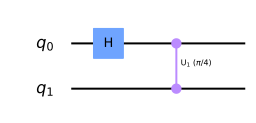

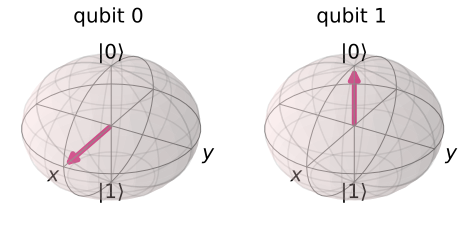

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
# Add Controlled-T
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

Q. What would happen to the control qubit (q0) if the if the target qubit (q1) was in the state |1⟩, and the circuit used a controlled-Sdg gate instead of the controlled-T?

A. q0 is rotated by $\pi/2$ around Z-axis of Bloch sphere (instead of $\pi/4$):

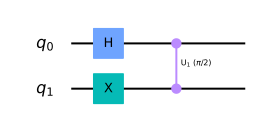

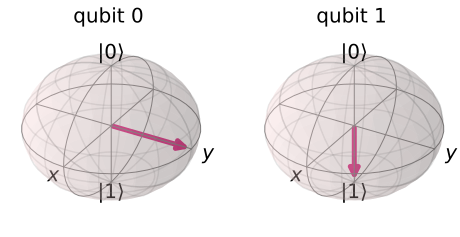

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-Sdg
qc.cu1(pi/2, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

Q. What would happen to the control qubit (q0) if it was in the state |1⟩ instead of the state |+⟩ before application of the controlled-T?

A. No change (up to a global phase), remains in state $|1\rangle$

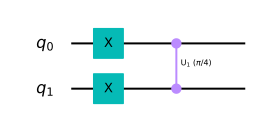

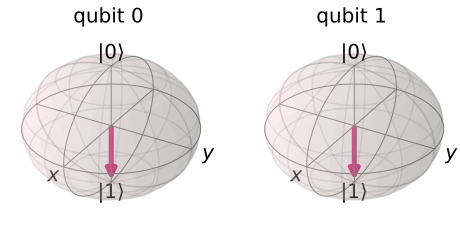

In [5]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
# Add Controlled-Sdg
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)